# Setings

Bibliotecas usadas:

- datetime
- pandas
- matplotlib

- sys
- json
- glob

- webvtt

Outros:

- Youtube API (https://developers.google.com/youtube/v3)
- Youtube-dl (https://youtube-dl.org/)

## Configurações básicas 

- Bibliotecas usadas
- Diretórios e locais de trabalho


In [2]:
# Bibliotecas usadas

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
import datetime
import json
import glob

from moviepy.editor import *
from PIL import Image

In [3]:
# Diretórios e locais de trabalho

cwd = os.getcwd()
print(cwd)

/Users/dumoura/Dev/PDev/Mashup_Vid_Processing/notebook


In [4]:
#Base_dir
BASE_DIR = os.path.dirname(cwd) # base de trabalho
DATA_DIR = os.path.join(BASE_DIR, "data") # dados gerais levantados durante projeto
META_DIR = os.path.join(BASE_DIR, "metadados") #metadados levantados durante projeto
SAMPLE_DIR = os.path.join(DATA_DIR, "sample") # material em processo - pode ser apagado ao final, caso julgue necessário
INPUTS_DIR = os.path.join(SAMPLE_DIR, "inputs") # local de trabalho para processamento de dados de midia 
OUTPUTS_DIR = os.path.join(SAMPLE_DIR, "outputs") # local de trabalho para processamento de dados de midia 

#MASHUPS
VIDS_DIR = os.path.join(DATA_DIR, "vids") # dados gerais levantados durante projeto

#Inputs
VID_DIR = os.path.join(INPUTS_DIR, "vid_input") # local de trabalho para processamento de dados de midia 
AUDIO_DIR = os.path.join(INPUTS_DIR, "audio_input") # local de trabalho para processamento de dados de midia # # Criar diretórios e locais de trabalho
LGG_DIR = os.path.join(INPUTS_DIR, "lgg_input") # local de trabalho para processamento de dados de midia 

#Outputs
FRAME_DIR = os.path.join(OUTPUTS_DIR, "thumbnails") # local de trabalho para processamento de dados de midia 
SONG_DIR = os.path.join(OUTPUTS_DIR, "songs") # local de trabalho para processamento de dados de midia # # Criar diretórios e locais de trabalho
LYRIC_DIR = os.path.join(OUTPUTS_DIR, "lyrics") # local de trabalho para processamento de dados de midia 

#Make_dirs
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(META_DIR, exist_ok=True)
os.makedirs(SAMPLE_DIR, exist_ok=True)
os.makedirs(INPUTS_DIR, exist_ok=True)
os.makedirs(OUTPUTS_DIR, exist_ok=True)

#Make_vids
os.makedirs(VIDS_DIR, exist_ok=True)

##Make_dirs inputs
os.makedirs(VID_DIR , exist_ok=True)
os.makedirs(AUDIO_DIR, exist_ok=True)
os.makedirs(LGG_DIR, exist_ok=True)

##Make_dirs outputs
os.makedirs(FRAME_DIR, exist_ok=True)
os.makedirs(SONG_DIR, exist_ok=True)
os.makedirs(LYRIC_DIR, exist_ok=True)

In [5]:
# Verificar se os diretórios e locais de trabalho foram criados corretamente
#os.listdir(BASE_DIR)

In [6]:
# Definir contexto -período- de trabalho 

now = datetime.datetime.now()
year = datetime.datetime.now().year
day = datetime.datetime.now().day
month = datetime.datetime.now().month

# Usar contexto para nomear documentos

context = f"_{month}-{day}-{year}"

In [7]:
#print(context) """retirar comentário para ver resultado"""

## Images_to_work

In [8]:
img_folders = os.listdir(FRAME_DIR)
print(img_folders)

folder = "B_WhiteStripes_Nirvana_DJBootOXs_Panicversion" #folder to parse

['.DS_Store', 'B_WhiteStripes_Nirvana_DJBootOXs_Panicversion']


In [9]:
img_dir = f'{FRAME_DIR}/{folder}'
img_root = os.path.join(img_dir, "*.jpg")
img_list = glob.glob(img_root)

len(img_list)

881

In [10]:
# Bibliotecas usadas

from skimage import measure
from skimage.filters import threshold_otsu
from skimage import color
from skimage import data
from skimage.feature import corner_harris
from skimage.feature import canny

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



## Basics

In [11]:
frame = mpimg.imread(img_list[200])

Type: <class 'numpy.ndarray'>
Dtype: uint8
Shape: (360, 480, 3)
Values min/max: 0 255
Values mean: 42.91385995370371


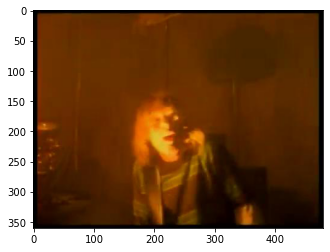

In [12]:
print('Type:', type(frame))
print('Dtype:', frame.dtype)
print('Shape:', frame.shape)
print('Values min/max:', frame.min(), frame.max())
print('Values mean:', frame.mean())

plt.imshow(frame, cmap='gray');

Type: <class 'numpy.ndarray'>
Dtype: float64
Shape: (360, 480)
Values min/max: 0.0 0.7498011764705882
Values mean: 0.18591955018836237


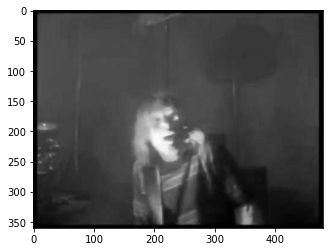

In [13]:

cinza = color.rgb2gray(frame)

print('Type:', type(cinza))
print('Dtype:', cinza.dtype)
print('Shape:', cinza.shape)
print('Values min/max:', cinza.min(), cinza.max())
print('Values mean:', cinza.mean())

plt.imshow(cinza, cmap='gray');

### Data types and image values

In [14]:
from skimage import img_as_float, img_as_ubyte

In [15]:
image_ubyte = img_as_ubyte(frame)
image_float = img_as_float(frame)

In [16]:
print("Type:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("Type:", image_float.dtype, image_float.min(), image_float.max())

Type: uint8 0 255
Type: float64 0.0 1.0


In [17]:
#color channels - RGB

r = image_float[...,0] #same as [:,:, 0]
g = image_float[...,1] #same as [:,:, 1]
b = image_float[...,2] #same as [:,:, 2]
color = frame

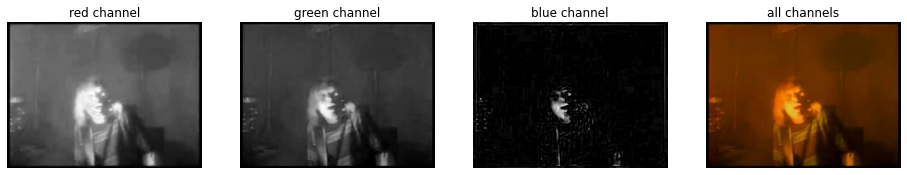

In [18]:
f, axes = plt.subplots(1,4, figsize=(16,5))

for ax in axes:
    ax.axis('off')
    
(ax_r, ax_g, ax_b, ax_color) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

ax_color.imshow(np.stack([r,g,b], axis =2))
ax_color.set_title('all channels');

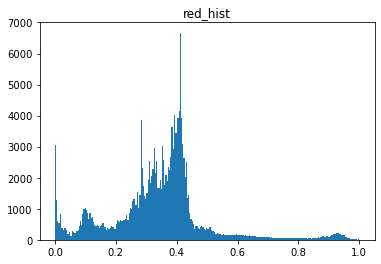

In [19]:
plt.hist(r.ravel(), bins=256)
plt.title("red_hist")
plt.show()

## Threshold

In [20]:
from skimage.filters import try_all_threshold

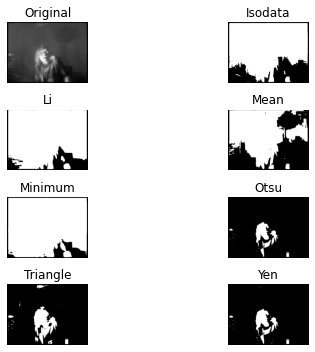

In [21]:
fig, ax = try_all_threshold(cinza, verbose=False)

In [22]:
from skimage.filters import threshold_otsu

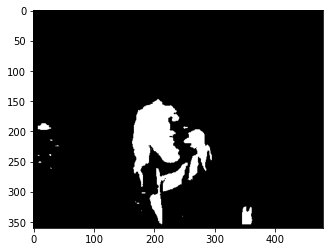

In [23]:
tresh_otsu = threshold_otsu(cinza)
binary = cinza > tresh_otsu
plt.imshow(binary, cmap="gray")

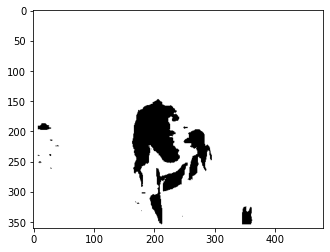

In [24]:
binary2 = cinza <= tresh_otsu
plt.imshow(binary2, cmap="gray")

### Edge detection 

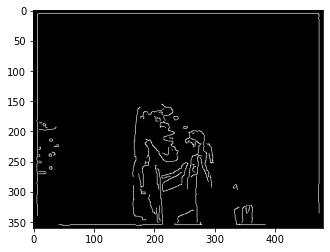

In [25]:
#posso aplicar na imagem com edges tbm
frame_edg_corner = canny(cinza)
plt.imshow(frame_edg_corner, cmap='gray')


In [26]:
#Edge detection SOBEL

from skimage.filters import sobel
import matplotlib.pyplot as plt

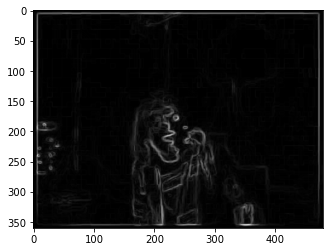

In [27]:
# apllay edge detection - sobel 
frame_edgeDetection = sobel(cinza) 
plt.imshow(frame_edgeDetection, cmap="gray")

### Corners were detection

In [28]:
#Find coordinates of the corners

from skimage.feature import corner_peaks

coords = corner_peaks(corner_harris(cinza), min_distance=5, indices=True) #corner_harris, corner_foerstner(
print('Total of', len(coords), 'corners were detected')
#print(coords)


Total of 13 corners were detected


In [29]:
#testar com o outro modelo
coords_2 = corner_peaks(corner_harris(cinza), min_distance=20)
print('Total of', len(coords_2), 'corners were detected')


Total of 4 corners were detected


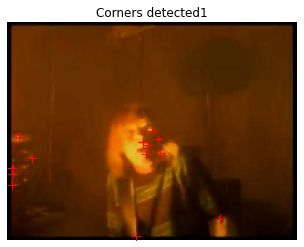

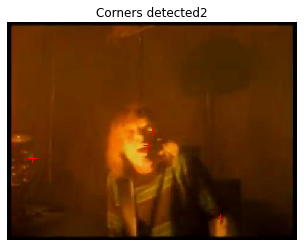

In [30]:
#function to show image with contours

def show_image_with_corners (image, coords, title='Corners detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1], coords[:,0], '+r', markersize =10)
    plt.axis( 'off')
    plt.show()

show_image_with_corners(frame, coords, 'Corners detected1')
show_image_with_corners(frame, coords_2, 'Corners detected2')

### Image colection

In [31]:
from skimage import io

In [32]:
ic = io.ImageCollection(img_list[200:215])
print("Type:", type(ic))
len(ic)

Type: <class 'skimage.io.collection.ImageCollection'>


15

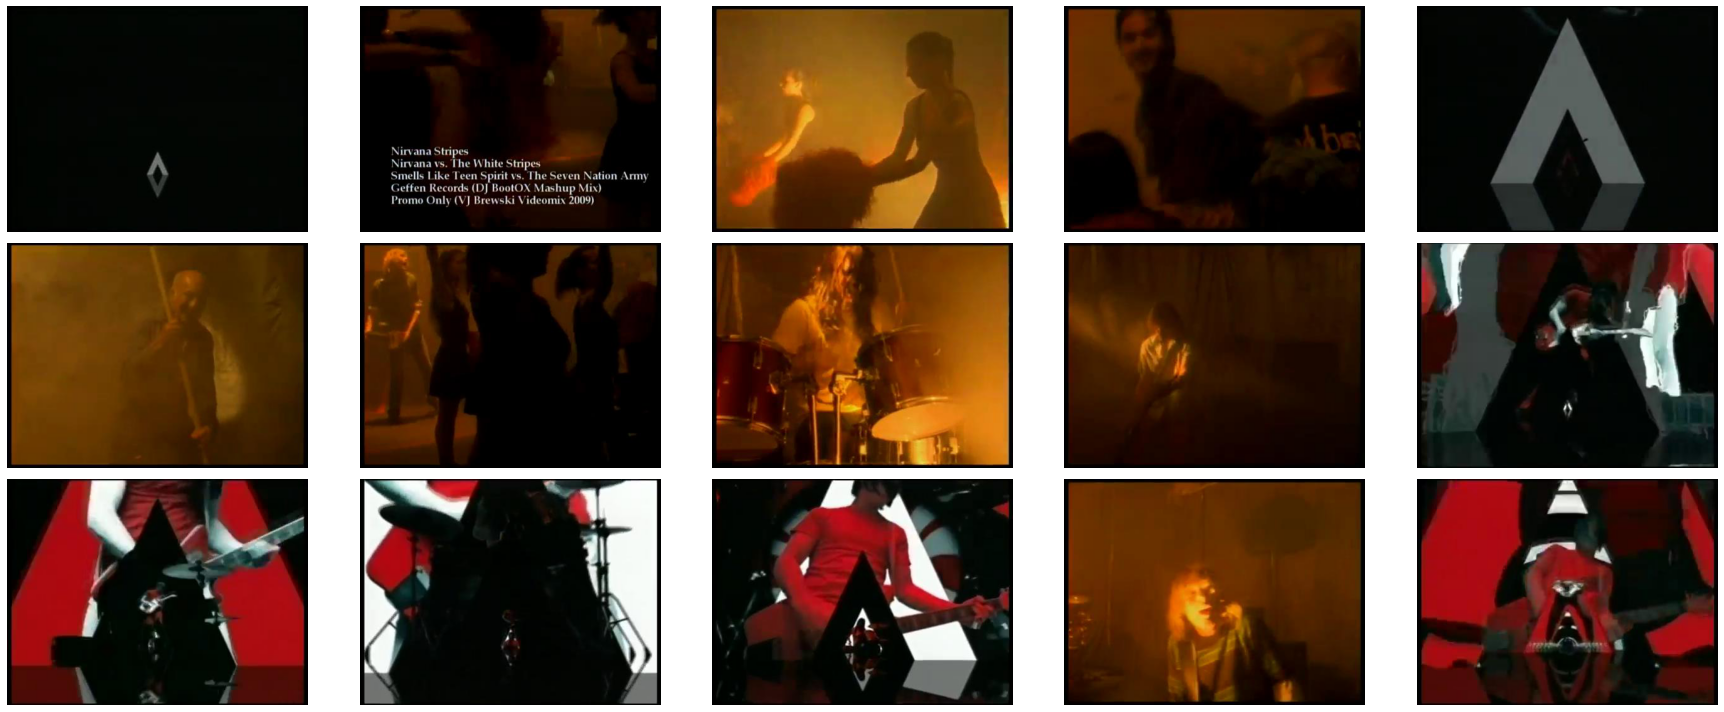

In [33]:
f, axes = plt.subplots(ncols= 5,  nrows=len(ic)//4, figsize=(25, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')
    
for i, image in enumerate(ic):
    axes[i].imshow(image, cmap = 'gray')
    #axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

In [34]:
for i, image in enumerate(ic):
    print("Type:", image.mean())

Type: 3.631917438271605
Type: 16.14899112654321
Type: 69.24402391975309
Type: 18.320713734567903
Type: 19.714471450617285
Type: 46.90279899691358
Type: 13.710891203703703
Type: 59.80312885802469
Type: 21.427168209876545
Type: 38.28294560185185
Type: 44.8825887345679
Type: 64.53514467592592
Type: 44.07417824074074
Type: 42.91385995370371
Type: 37.18914544753086


In [35]:
from skimage import color    

Image 0 - Total of 1 corners were detected


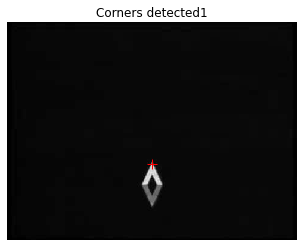

Image 1 - Total of 22 corners were detected


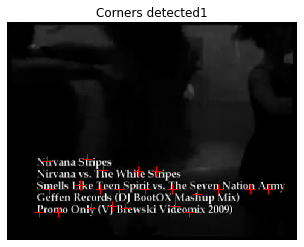

Image 2 - Total of 0 corners were detected


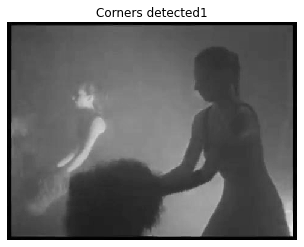

Image 3 - Total of 1 corners were detected


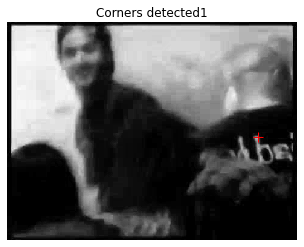

Image 4 - Total of 6 corners were detected


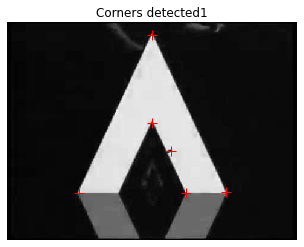

Image 5 - Total of 0 corners were detected


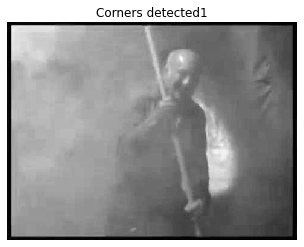

Image 6 - Total of 3 corners were detected


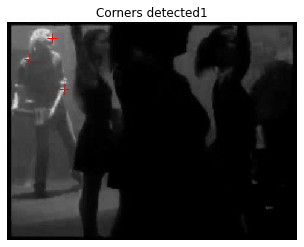

Image 7 - Total of 7 corners were detected


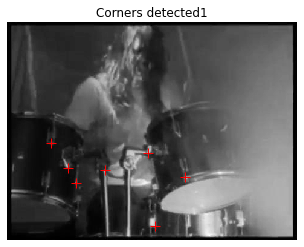

Image 8 - Total of 3 corners were detected


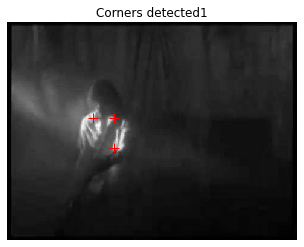

Image 9 - Total of 9 corners were detected


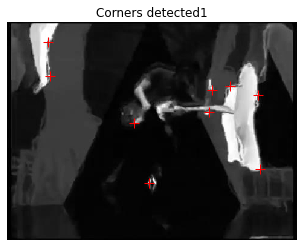

Image 10 - Total of 9 corners were detected


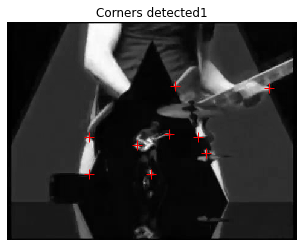

Image 11 - Total of 2 corners were detected


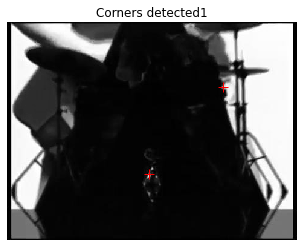

Image 12 - Total of 18 corners were detected


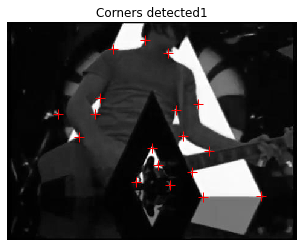

Image 13 - Total of 4 corners were detected


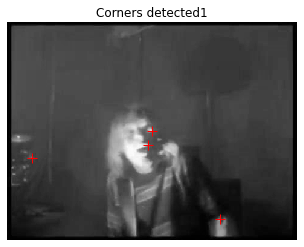

Image 14 - Total of 8 corners were detected


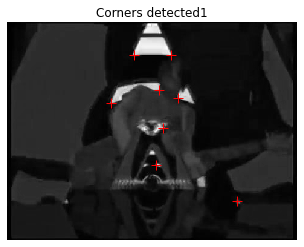

In [36]:
ic = io.ImageCollection(img_list[200:215])

def show_image_with_corners (image, coords, title='Corners detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1], coords[:,0], '+r', markersize =10)
    plt.axis( 'off')
    plt.show()
   
for i, image in enumerate(ic):
    image_gray = color.rgb2gray(image)
    coords = corner_peaks(corner_harris(image_gray), min_distance=20, indices=True) #corner_harris, corner_foerstner(
    print("Image", i,"-", 'Total of', len(coords), 'corners were detected')
    show_image_with_corners(image_gray, coords, 'Corners detected1')

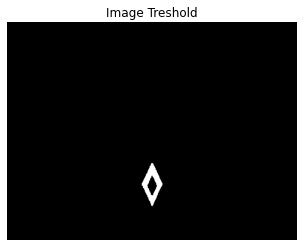

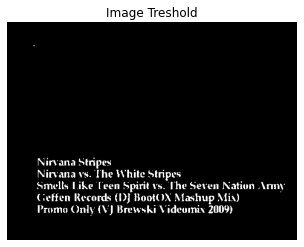

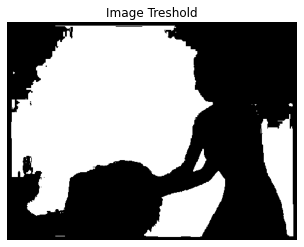

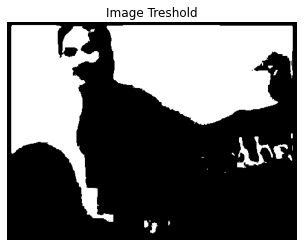

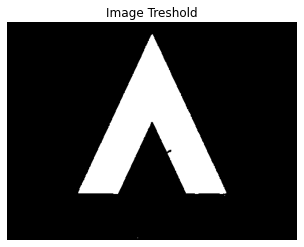

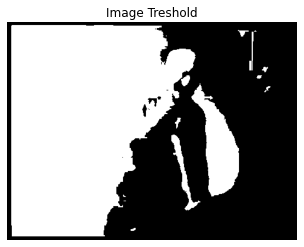

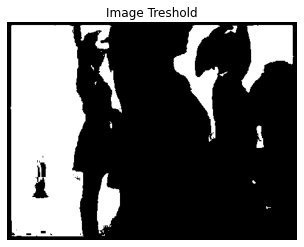

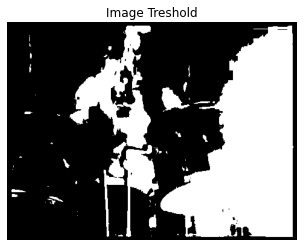

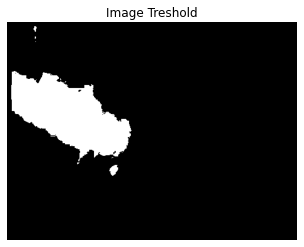

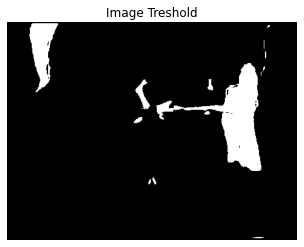

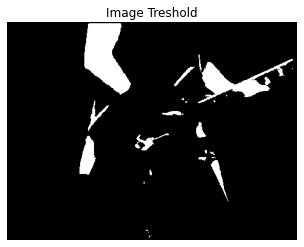

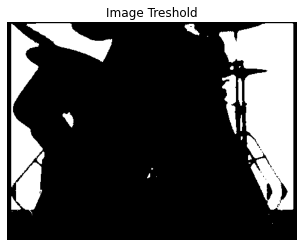

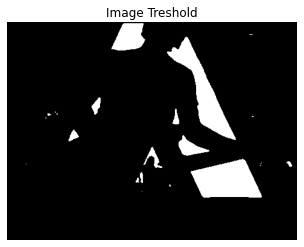

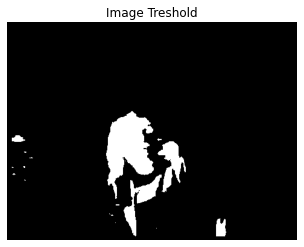

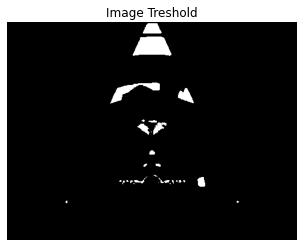

In [37]:
def show_image_treshold(image, title='Image Treshold'):
    plt.imshow(image, cmap='gray')
#     plt.plot(coords[:,1], coords[:,0], '+r', markersize =10)
    plt.title(title)
    plt.axis( 'off')
    plt.show()
    
for i, image in enumerate(ic):
    image_gray = color.rgb2gray(image)
    tresh_otsu = threshold_otsu(image_gray)
    binary = image_gray > tresh_otsu # figura > ou fundo <= 
    show_image_treshold(binary, title='Image Treshold')

In [60]:
# for i, image in enumerate(ic):
os.system(f"magick identify {FRAME_DIR}/{folder}/{image}")

512

In [37]:
# Create an ImageJ gateway with the newest available version of ImageJ.
# !pip3 install pyimagej

In [38]:
#https://www.youtube.com/watch?v=5e9jhgiqbzc

In [39]:
import numpy as np
from matplotlib import pyplot as plt

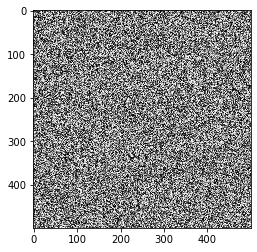

In [40]:
random_image = np.random.random([500, 500])
plt.imshow(random_image, cmap='gray', interpolation='nearest');

<class 'numpy.ndarray'> uint8 (303, 384)


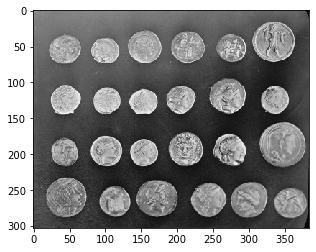

In [41]:
from skimage import data
coins = data.coins()
print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest')

Shape: (300, 451, 3)
Value min/max: 0 231


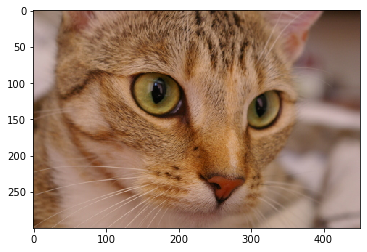

In [42]:
cat = data.chelsea()
print('Shape:', cat.shape)
print('Value min/max:', cat.min(), cat.max())
plt.imshow(cat, interpolation='nearest')

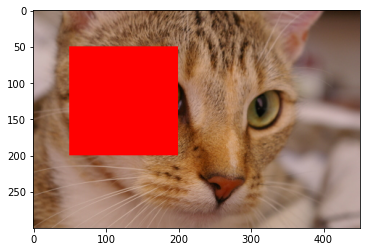

In [43]:
cat[50:200, 50:200, :] = [255, 0, 0]
plt.imshow(cat)

In [44]:
camera_man = data.camera()

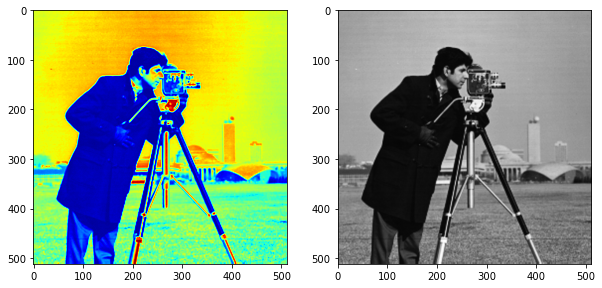

In [45]:
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(camera_man, cmap='jet')
ax_gray.imshow(camera_man, cmap='gray')

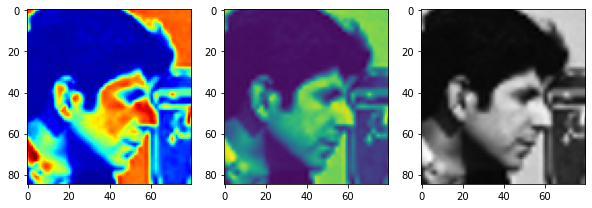

In [46]:
face = camera_man[80:165, 200:280]

fig, (ax_jet, ax_v, ax_gray) = plt.subplots(ncols=3, figsize=(10, 5))

ax_jet.imshow(face, cmap='jet')
ax_v.imshow(face, cmap='viridis')
ax_gray.imshow(face, cmap='gray')

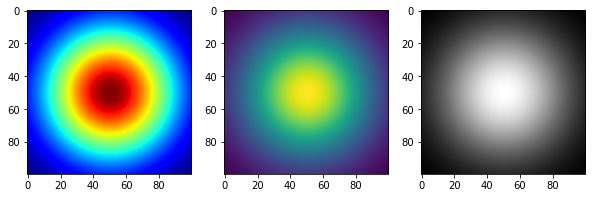

In [47]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2)/15)

fig, (ax_jet, ax_v, ax_gray) = plt.subplots(ncols=3, figsize=(10, 5))

ax_jet.imshow(R, cmap='jet')
ax_v.imshow(R, cmap='viridis')
ax_gray.imshow(R, cmap='gray')

uint8
(360, 480, 3)
255 0


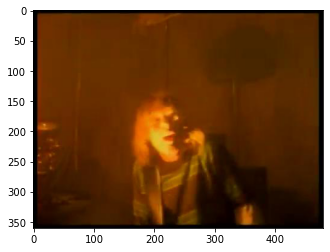

In [48]:
print(frame.dtype)
print(frame.shape)
print(frame.max(), frame.min())
plt.imshow(frame);

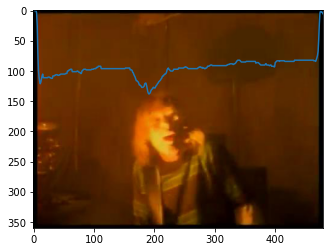

In [49]:
# red, blue, green intensity

red_row = frame[20, :, 0]
plt.plot(red_row)
plt.imshow(frame)

In [50]:
def plot_intensity(image, row):
    red_value = image[row, :, 0]
    green_value = image[row, :, 1]
    blue_value = image[row, :, 2]
    
    plt.figure()
    plt.plot(red_value, 'r')
    plt.plot(green_value, 'g')
    plt.plot(blue_value, 'b')

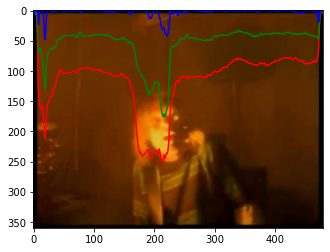

In [51]:
plot_intensity(frame, 190)
plt.imshow(frame)

## Face detection

In [52]:
from skimage.feature import Cascade

In [53]:
tranined_file = data.lbp_frontal_face_cascade_filename()

In [54]:
detector = Cascade(tranined_file)

In [55]:
detected = detector.detect_multi_scale(img = frame, 
                                       scale_factor =1.2, 
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200)
                                      )

In [56]:
print(detected)

[{'r': 109, 'c': 190, 'width': 121, 'height': 121}, {'r': 252, 'c': 199, 'width': 66, 'height': 66}]


In [57]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def show_detected_face(result, detected, title='Face Image'):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r', linewidth=2))
    plt.show()   

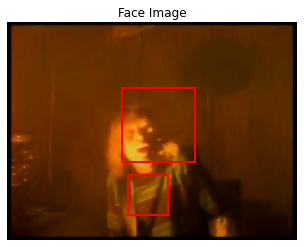

In [58]:
show_detected_face(frame, detected)

0 []


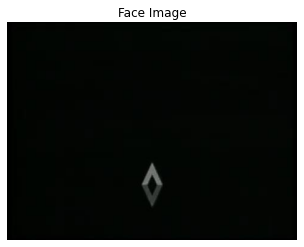

1 []


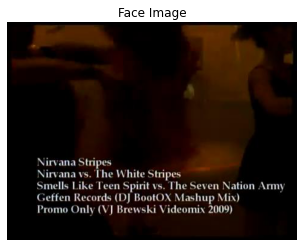

2 []


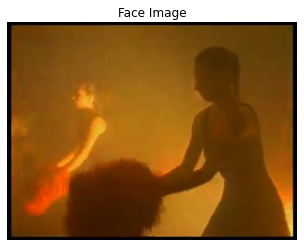

3 [{'r': 13, 'c': 76, 'width': 92, 'height': 92}]


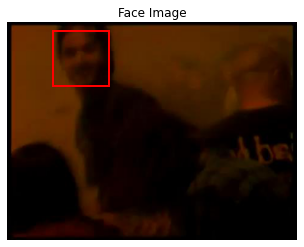

4 []


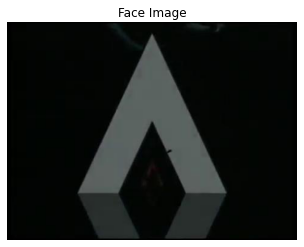

5 [{'r': 186, 'c': 315, 'width': 73, 'height': 73}]


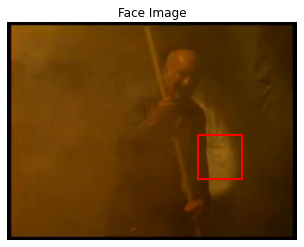

6 []


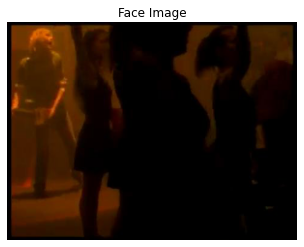

7 []


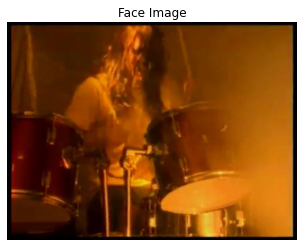

8 []


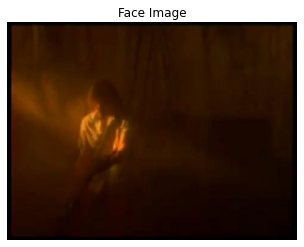

9 []


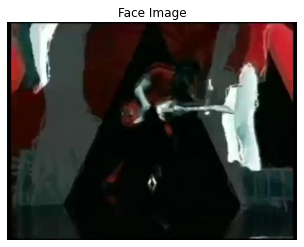

10 []


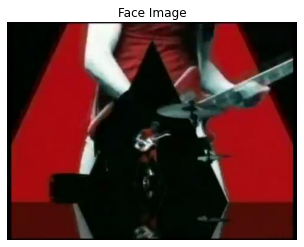

11 []


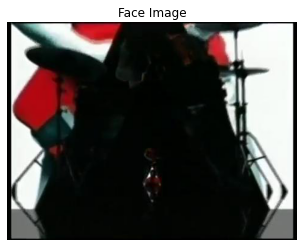

12 []


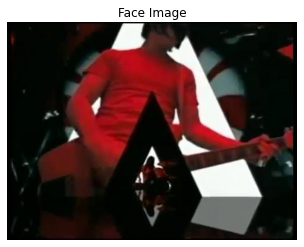

13 [{'r': 109, 'c': 190, 'width': 121, 'height': 121}, {'r': 252, 'c': 199, 'width': 66, 'height': 66}]


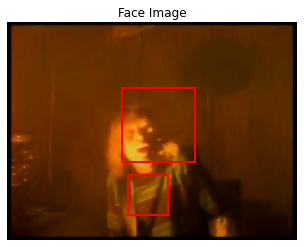

14 []


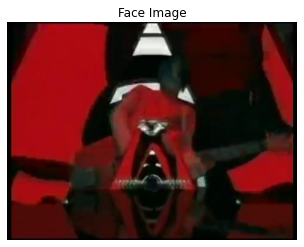

In [59]:
for i, image in enumerate(ic):
    detected = detector.detect_multi_scale(img = image, 
                                       scale_factor =1.2, 
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200)
                                      )
    print(i, detected)
    show_detected_face(ic[i], detected)


In [67]:
from skimage.segmentation import slic
from skimage.color import lab2rgb

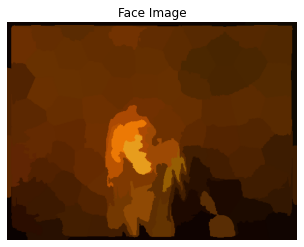

In [70]:
# Obtain the segmentation with default 100 regions
segments = slic(frame)

# Obtain segmented image using label2rgb
segmented_image = color.label2rgb(segments, frame, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

In [71]:
from skimage.feature import Cascade
from skimage.filters import gaussian

In [73]:
tranined_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(tranined_file)

In [83]:
detected = detector.detect_multi_scale(img = frame, 
                                       scale_factor =1.2, 
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200)
                                      )

In [103]:
def getFace(d):
    x, y = d['r'], d['c']
    width, height = d['r'] + d['width'], d['c'] + d['height']
    face = frame[x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
    x, y = d['r'], d['c']
    width, height = d['r'] + d['width'], d['c'] + d['height']
    face = frame[x:width, y:height]
    return original

In [104]:
for d in detected:
    face = getFace(d)
    gaussian_face = gaussian(face, multichannel=True, sigma = 10)
    resulting_image = mergeBlurryFace(frame, gaussian_face)

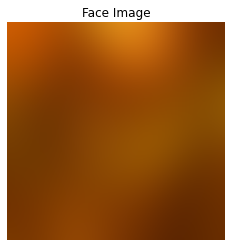

In [106]:
show_detected_face( gaussian_face, detected)

### Image data

In [304]:
import imageio

In [305]:
img_dir = f'{FRAME_DIR}/{folder}'
img_root = os.path.join(img_dir, "*.jpg")
img_list = glob.glob(img_root)

len(img_list)

881

In [306]:
img_list[100]

'/Users/dumoura/Dev/PDev/Mashup_Vid_Processing/data/sample/outputs/thumbnails/B_WhiteStripes_Nirvana_DJBootOXs_Panicversion/585-B_WhiteStripes_Nirvana_DJBootOXs_Panicversion.jpg'

In [307]:
im = imageio.imread(img_list[100])

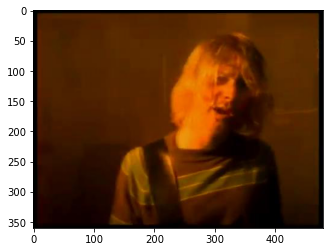

In [308]:
plt.imshow(im)

(-0.5, 479.5, 359.5, -0.5)

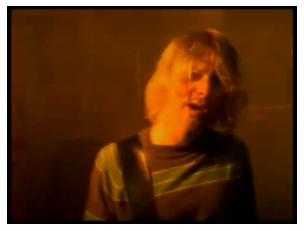

In [309]:
#vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
plt.imshow(im, cmap='gray', vmin=-100, vmax=100) #https://matplotlib.org/2.0.2/users/colormaps.html
plt.axis('off')

In [310]:
type(im)

imageio.core.util.Array

In [311]:
im[0,0]

Array([10,  0,  9], dtype=uint8)

In [312]:
im[0:2, 0:2]

Array([[[10,  0,  9],
        [ 8,  0,  9]],

       [[ 9,  0,  8],
        [ 8,  0,  9]]], dtype=uint8)

In [313]:
im.meta

Dict([('jfif', 257),
      ('jfif_version', (1, 1)),
      ('jfif_unit', 0),
      ('jfif_density', (1, 1)),
      ('exif',
       b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00&\x00\x00\x00\x00\x00\x02\x90\x00\x00\x07\x00\x00\x00\x040231\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\x00\x00\x00\x00'),
      ('dpi', (72, 72)),
      ('photoshop',
       Dict([(1028,
              b'\x1c\x01Z\x00\x03\x1b%G\x1c\x02\x00\x00\x02\x00\x04\x1c\x02\x19\x00\x19B_Instrumental_main-track\x1c\x027\x00\x0820210318'),
             (1061,
              b'1\xee\x84\x18\x16\xf6\x08\x85\x18\x826S\xda\xb8E\xdc')])),
      ('EXIF_MAIN',
       Dict([('ExifVersion', b'0231'),
             ('ExifOffset', 38),
             ('Orientation', 1),
             ('ColorSpace', 65535)]))])

In [374]:
im.meta.photoshop[1028][22:45]

b'Instrumental_main-track'

In [354]:
im.meta.EXIF_MAIN

Dict([('ExifVersion', b'0231'),
      ('ExifOffset', 38),
      ('Orientation', 1),
      ('ColorSpace', 65535)])

In [331]:
im.meta['photoshop']

AttributeError: 'Dict' object has no attribute 'ipynb_checkpoints'

In [ ]:
# https://youtu.be/5e9jhgiqbzc?t=7089

In [ ]:
from skimage import io, color

In [220]:
im = io.imread(img_list[100])

(-0.5, 479.5, 359.5, -0.5)

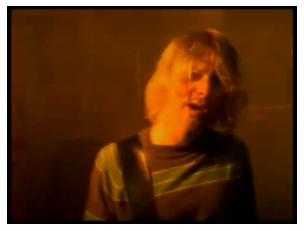

In [221]:
plt.imshow(im)
plt.axis('off')

In [222]:
im_lab = color.rgb2lab(im) #lab = luz e cor... sendo que o valor 0 serve para luz/brilho... então abaixo se cria uma daata com valores de cor sem brilho
data = np.array([im_lab[..., 1].ravel(), im_lab[..., 2].ravel()])

In [233]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data.T)
segmentation = kmeans.labels_.reshape(im.shape[:-1])

In [234]:
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

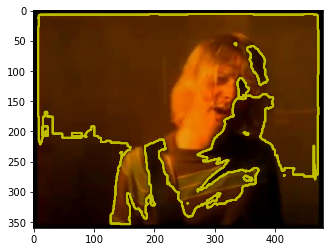

In [235]:
plt.imshow(im)
plt.contour(segmentation, colors='y')

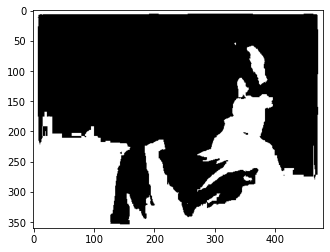

In [236]:
plt.imshow(segmentation)

In [237]:
## teste

In [238]:
im_lab = color.rgb2lab(im) #lab = luz e cor... sendo que o valor 0 serve para luz/brilho... então abaixo se cria uma daata com valores de cor sem brilho
data = np.array([im_lab[..., 0].ravel(), 
                 im_lab[..., 1].ravel(),
                 im_lab[..., 2].ravel()
                ])

In [263]:
rows, cols, ch = im.shape
kmeans = KMeans(n_clusters=4, random_state=0).fit(data.T)
# segmentation = kmeans.labels_.reshape(im.shape[:-1])
segmentation = kmeans.labels_.reshape((rows, cols))

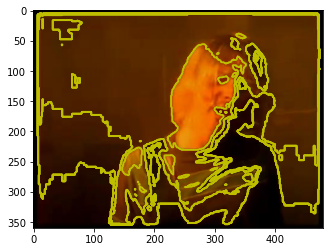

In [264]:
plt.imshow(im)
plt.contour(segmentation, colors='y')

(-0.5, 479.5, 359.5, -0.5)

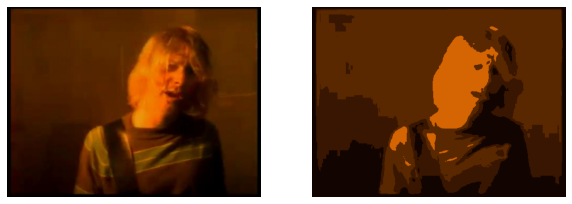

In [265]:
color_avg = color.label2rgb(segmentation, im, kind='avg')

fig, axes = plt.subplots(1,2, figsize=(10,12))
axes[0].imshow(im)
axes[0].axis('off')

axes[1].imshow(color_avg)
axes[1].axis('off')

In [266]:
color.label2rgb??

In [267]:
data = np.array([im_lab[..., 1].ravel(),
                 im_lab[..., 0].ravel()])

kmeans = KMeans(n_clusters=3).fit(data.T)
segmentation = kmeans.labels_.reshape(im.shape[:-1])

(-0.5, 479.5, 359.5, -0.5)

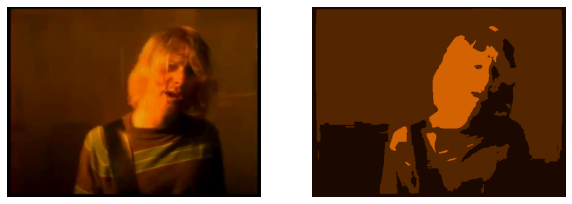

In [268]:
color_avg = color.label2rgb(segmentation, im, kind='avg')

fig, axes = plt.subplots(1,2, figsize=(10,12))
axes[0].imshow(im)
axes[0].axis('off')

axes[1].imshow(color_avg)
axes[1].axis('off')

In [269]:
from skimage import segmentation

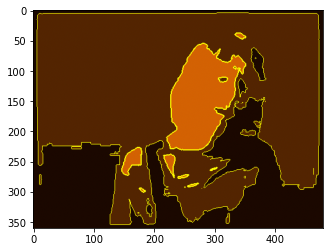

In [277]:
plt.imshow(segmentation.mark_boundaries(color_avg, labels))